# Policy Experiments

Generate the policy results with `dp_policy run [experiment]` or `dp_policy run_all`.

In [1]:
from dp_policy.titlei.utils import get_inputs, get_sppe
from dp_policy.titlei.evaluation import load_treatments
from dp_policy.experiments import Experiment

import matplotlib.pyplot as plt

saipe = get_inputs(2021)
sppe = get_sppe("../data/sppe18.xlsx")
print(saipe.shape)

plt.style.use('seaborn-deep')

%matplotlib inline
%load_ext autoreload
%autoreload 2

/opt/miniconda3/envs/dp-acs/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


/Users/steed/dp-policy
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
(13190, 25)


In [7]:
experiment_kwargs = dict(
  trials = 1000,
  eps = [0.1],
  delta = [0.0],
  baseline = load_treatments("baseline")['baseline']
)

In [24]:
experiment_kwargs['baseline']['true_children_eligible'].describe()

count    1.319000e+07
mean     6.459567e+02
std      2.982825e+03
min      0.000000e+00
25%      5.500000e+01
50%      1.530000e+02
75%      4.290000e+02
max      1.529460e+05
Name: true_children_eligible, dtype: float64

### Hold harmless provision

In [25]:
experiment = Experiment.get_experiment("hold_harmless", **experiment_kwargs)
experiment.plot()

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...


/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# No provisions (baseline)
True budget: 11661575735226.518
DP est budget: 11661575735226.521
Avg prop. districts erroneously ineligible: 2430.836
# est
# rows: 13190000
Max error: 151439424.96394557
-- RMSE --
RMSE: 835839.1383269638
Avg. RMSE 822100.9664660777
RMSE in exp. error: 63751.91217556897
-- Losses --
Avg. (per trial) # of districts losing $$: 6302.09
Avg. total losses: 1059647666.643475
Std. total losses: 31494557.600925934
Total exp losses: 106857613.88472036
Average exp loss 20886.94563813924
Total 5% quantile losses: 4228908071.126723
Avg. 5% quantile loss: -339208.1552199184
-- Misalloc --
Avg. total abs misalloc: 2119295333.2869496
Total exp abs misalloc: 213715227.76944035
# dpest
# rows: 13190000

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


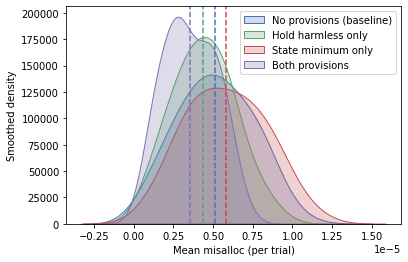

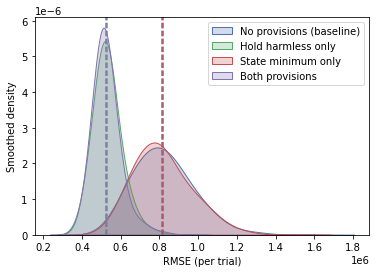

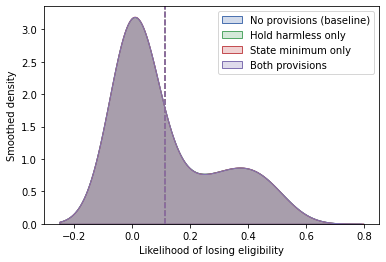

Plotting error_per_child


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:309: FutureWarning: ['switched_eligibility', 'became_eligible', 'became_ineligible', 'switched_eligibility_dp', 'became_eligible_dp', 'became_ineligible_dp'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  results[[
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:308: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base

All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 1425 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.3072830479181805
All but 4918 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 5.02880923055638
All but 1468 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.799542560263059


In [ ]:
experiment = Experiment.get_experiment("hold_harmless", no_match_true=True, **experiment_kwargs)
experiment.plot()

### Post-processing

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# None
True budget: 11661575735226.518
DP est budget: 11661575735226.523
Avg prop. districts erroneously ineligible: 2433.081
# est
# rows: 13190000
Max error: 122889197.16521525
-- RMSE --
RMSE: 828717.1424257592
Avg. RMSE 815292.0521261405
RMSE in exp. error: 60100.07570028349
-- Losses --
Avg. (per trial) # of districts losing $$: 6302.805
Avg. total losses: 1058190847.8711585
Std. total losses: 31845028.451168723
Total exp losses: 107961143.18492502
Average exp loss 20878.19438888513
Total 5% quantile losses: 4228022142.210911
Avg. 5% quantile loss: -339137.0933031933
-- Misalloc --
Avg. total abs misalloc: 2116381695.7423165
Total exp abs misalloc: 215922286.3698497
# dpest
# rows: 13190000
Max error: 1210777

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


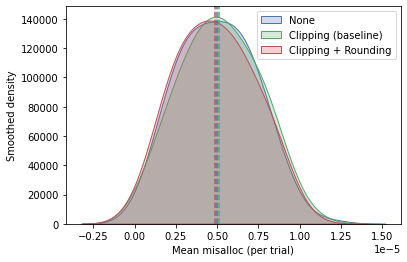

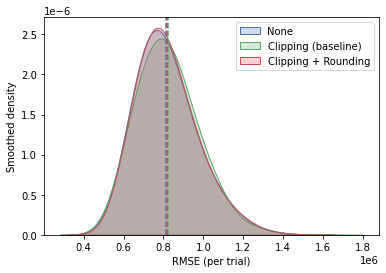

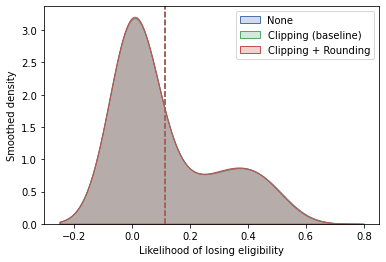

Plotting error_per_child


/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(


All but 4846 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.479180619361243
All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 4892 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.441330417731699


In [ ]:
experiment = Experiment.get_experiment("post_processing", **experiment_kwargs)
experiment.plot()

### Moving average

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# Lag 0
True budget: 11661575735226.54
DP est budget: 11661575735226.521
Avg prop. districts erroneously ineligible: 2398.474
# est
# rows: 13190000
Max error: 151783167.54649478
-- RMSE --
RMSE: 836235.5783195198
Avg. RMSE 822486.2372210638
RMSE in exp. error: 68754.5169008172
-- Losses --
Avg. (per trial) # of districts losing $$: 6296.473
Avg. total losses: 1060421256.1049548
Std. total losses: 31529577.155638758
Total exp losses: 113583042.44385897
Average exp loss 22567.661920099137
Total 5% quantile losses: 4228908071.126723
Avg. 5% quantile loss: -339317.0240814188
-- Misalloc --
Avg. total abs misalloc: 2120842512.2099097
Total exp abs misalloc: 227166084.88771778
# dpest
# rows: 13190000
Max error: 152144

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


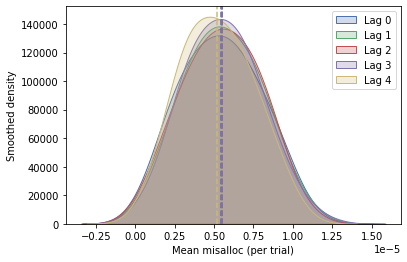

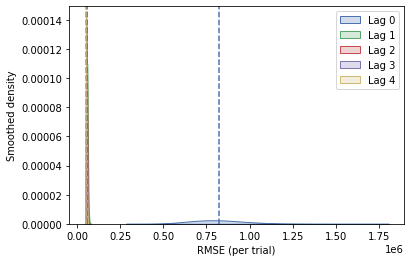

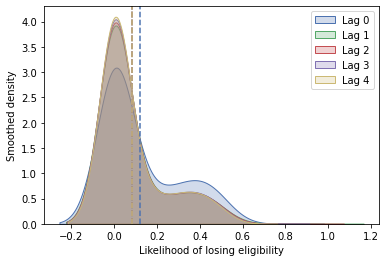

Plotting error_per_child


/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and wi

All but 4628 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 2939 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 3.5417134859222488
All but 2590 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 3.2729425360086024
All but 4653 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 3.5510822675496874
All but 7704 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 3.0846028954150975


In [ ]:
experiment = Experiment.get_experiment("moving_average", **experiment_kwargs)
experiment.plot()

### Alternative thresholding

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# None
True budget: 11661575735226.518
DP est budget: 11661575735226.52
Avg prop. districts erroneously ineligible: 0.0
# est
# rows: 13190000
Max error: 129673766.37931299
-- RMSE --
RMSE: 830153.2993262162
Avg. RMSE 816830.6200294315
RMSE in exp. error: 244880.56612480842
-- Losses --
Avg. (per trial) # of districts losing $$: 5323.065
Avg. total losses: 1057834622.2705191
Std. total losses: 30661661.568215266
Total exp losses: 367005483.36323524
Average exp loss 82920.35322260173
Total 5% quantile losses: 3921491631.720135
Avg. 5% quantile loss: -322783.0794073698
-- Misalloc --
Avg. total abs misalloc: 2115669244.541038
Total exp abs misalloc: 734010966.7264702
# dpest
# rows: 13190000
Max error: 130158581.792

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/array

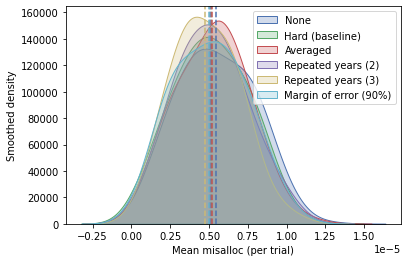

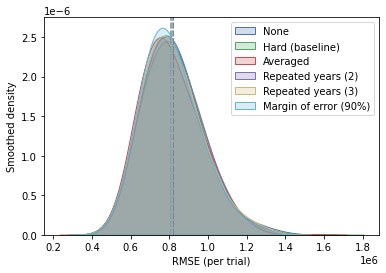

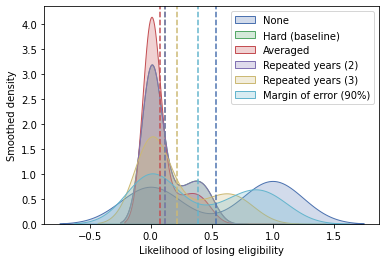

Plotting error_per_child


/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:265: FutureWarning: merging between different levels is deprecated and wi

All but 1932 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.230177290055269
All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 8079 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.316067540415581
All but 4920 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.490327698595198
All but 5077 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.469121834489666
All but 3201 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.3081303243192535


In [ ]:
experiment = Experiment.get_experiment("thresholds", **experiment_kwargs)
experiment.plot()

### Epsilon Sensitivity

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
[WARN] Epsilon is none - only use this if there is only one eps value in the df.
13190000

# 0.001
True budget: 11661575735226.518
DP est budget: 11661575735226.543
Avg prop. districts erroneously ineligible: 5721.446
# est
# rows: 13190000
Max error: 139072184.83536857
-- RMSE --
RMSE: 838271.1479192198
Avg. RMSE 824055.4655441602
RMSE in exp. error: 54708.6953282431
-- Losses --
Avg. (per trial) # of districts losing $$: 6305.323
Avg. total losses: 1060791577.2623
Std. total losses: 31366008.811736863
Total exp losses: 105344700.12856969
SD in total. exp. losses 91576370.40362874
Average exp loss 20387.981445436362
Total 5% quantile losses: 4235069348.2119746
Avg. 5% quantile loss: -339702.3620928832
-- Misalloc --
Avg. total abs misalloc: 212

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/array

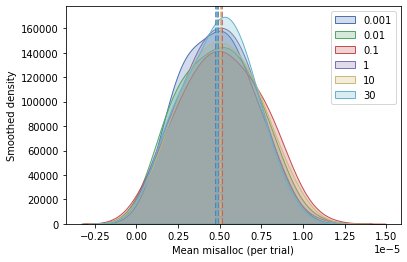

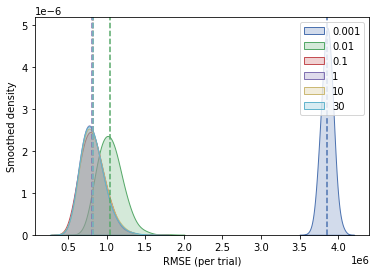

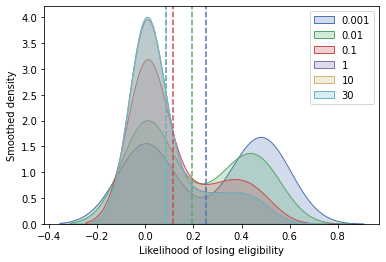

Plotting error_per_child


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is de

All but 4888 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.504062637901318
All but 4882 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.470929850024668
All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 4889 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.477590831920147
All but 4915 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.487953583339739
All but 4924 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.483007391042044


In [8]:
experiment = Experiment.get_experiment("epsilon", **experiment_kwargs)
experiment.plot()

### Budget increases

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# Biden proposal ($2.0e+10)
True budget: 11661575735226.518
DP est budget: 26392660487364.074
Avg prop. districts erroneously ineligible: 2431.081
# est
# rows: 13190000
Max error: 634239475.1444138
-- RMSE --
RMSE: 7006617.652557893
Avg. RMSE 6992690.573434783
RMSE in exp. error: 6748621.220483945
-- Losses --
Avg. (per trial) # of districts losing $$: 1232.359
Avg. total losses: 70935450.46151763
Std. total losses: 4024017.148862245
Total exp losses: 0.0
SD in total. exp. losses 0.0
Average exp loss nan
Total 5% quantile losses: 365330567.12559015
Avg. 5% quantile loss: -49209.39751152885
-- Misalloc --
Avg. total abs misalloc: 14872955653.060492
Total exp abs misalloc: 14731084752.137457
# dpest
# rows: 1319000

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


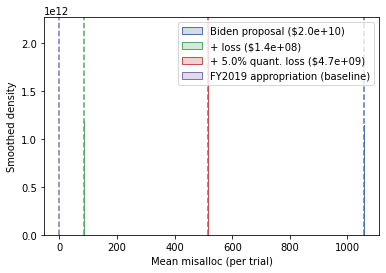

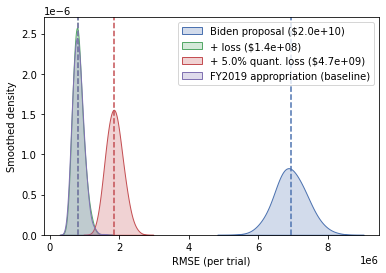

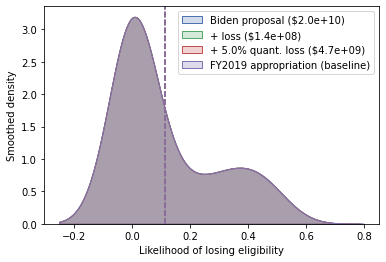

Plotting error_per_child


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is de

KeyboardInterrupt: 

In [3]:
experiment = Experiment.get_experiment("budget", **experiment_kwargs)
experiment.plot()

### Sampling variance sensitivity

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# Gaussian (0.5)
True budget: 11661575735226.518
DP est budget: 11661575735226.527
Avg prop. districts erroneously ineligible: 1754.718
# est
# rows: 13190000
Max error: 68171363.97382161
-- RMSE --
RMSE: 418522.3284026681
Avg. RMSE 411816.46692210605
RMSE in exp. error: 28152.55030548239
-- Losses --
Avg. (per trial) # of districts losing $$: 6285.166
Avg. total losses: 532889968.5996185
Std. total losses: 15092268.232257757
Total exp losses: 53090634.07408291
Average exp loss 8516.303188014583
Total 5% quantile losses: 2161867412.289659
Avg. 5% quantile loss: -173407.1879593855
-- Misalloc --
Avg. total abs misalloc: 1065779937.1992366
Total exp abs misalloc: 106181268.1481655
# dpest
# rows: 13190000
Max error:

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/array

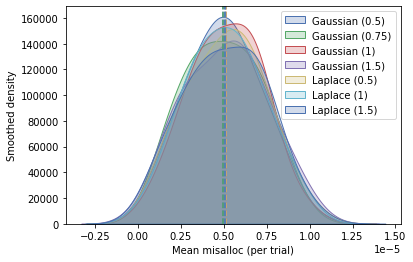

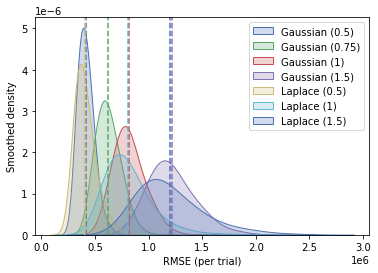

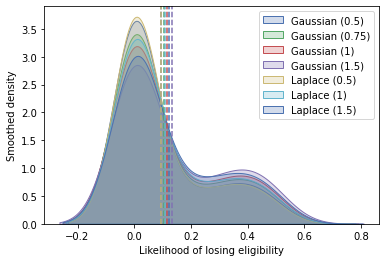

Plotting error_per_child


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is de

All but 6499 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.026153442114566
All but 5493 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.2137342977930725
All but 4936 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.485819679186682
All but 3871 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.852386883230494
All but 6653 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.013733619409673
All but 5103 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.501875553823508
All but 4073 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.941599828707744


In [3]:
experiment = Experiment.get_experiment("sampling", **experiment_kwargs)
experiment.plot()

### Robustness check: varying total children

/home/rsteed/dp-acs
[INFO] Successfully imputed 2937 new indices
-- WARNING: dropping some balances from total budget --
Puerto Rico 412450771.2306171
County balances 723748.7996060263
Part D Subpart 2 104168000.98352575
Using given baseline...
Comparing at eps= 0.1
13190000

# Total number of children is fixed (baseline)
True budget: 11661575735226.518
DP est budget: 11661575735226.521
Avg prop. districts erroneously ineligible: 2430.836
# est
# rows: 13190000
Max error: 151439424.96394557
-- RMSE --
RMSE: 835839.1383269638
Avg. RMSE 822100.9664660777
RMSE in exp. error: 63751.91217556897
-- Losses --
Avg. (per trial) # of districts losing $$: 6302.09
Avg. total losses: 1059647666.643475
Std. total losses: 31494557.600925934
Total exp losses: 106857613.88472036
Average exp loss 20886.94563813924
Total 5% quantile losses: 4228908071.126723
Avg. 5% quantile loss: -339208.1552199184
-- Misalloc --
Avg. total abs misalloc: 2119295333.2869496
Total exp abs misalloc: 213715227.76944035
# dp

/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


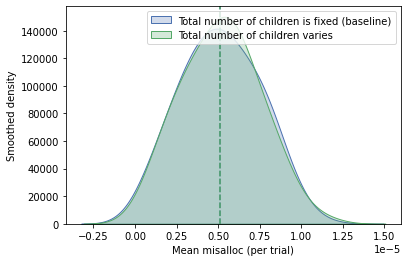

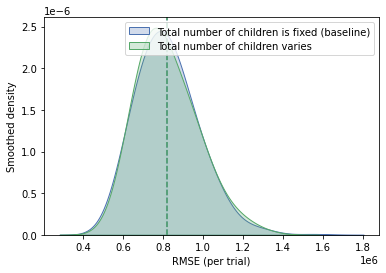

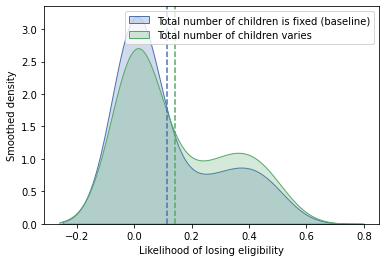

Plotting error_per_child


/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  joined = geo.join(
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/venv/lib/python3.9/site-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/home/rsteed/dp-acs/dp_policy/titlei/evaluation.py:314: FutureWarning: merging between different levels is de

All but 4876 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.445795649116857
All but 3296 are significantly different from zero at 0.1
None of the 90.0% MOEs exceeds 4.4852464152583105


In [4]:
experiment = Experiment.get_experiment("vary_total_children", **experiment_kwargs)
experiment.plot()